**Context**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

**Data**

- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

**Objective**

- Explore and visualize the dataset.
- Build a linear regression model to predict the prices of used cars.
- Generate a set of insights and recommendations that will help the business.

## Data structure and initial observations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import *
from sklearn.linear_model import *

%matplotlib inline

In [2]:
data = pd.read_csv('used_cars_data.csv')   # the original data

In [3]:
df = data.copy()   # copy the data to df

In [27]:
df.head()   # display the first 5 rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [31]:
df.sample(5)   # randomly display 5 rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1302,1302,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,57456,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,21.56
2426,2426,Maruti Wagon R LXI BSIII,Pune,2007,83000,Petrol,Manual,First,14.0 kmpl,1061 CC,64 bhp,5.0,NaN,1.65
4860,4860,Maruti Alto K10 2010-2014 VXI,Hyderabad,2013,30131,Petrol,Manual,First,20.92 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
773,773,Maruti Ritz VXi,Kolkata,2011,50000,Petrol,Manual,Second,18.5 kmpl,1197 CC,85.80 bhp,5.0,NaN,1.50
3495,3495,Maruti Wagon R LXI BS IV,Pune,2010,91000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.30


In [32]:
df.tail()  # display the last 5 rwos

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [8]:
df.shape 

(7253, 14)

In [34]:
df.info()    # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**observation:** 
- 7253 rows and 14 columns. Serial number, year, Kilometers_Driven, Seats and price are numerical. Others are objects.
- Name of the car includes Brand name and Model name, which could be seperated into two columns.
- Mileage, engine and Power should be numbers instead of objects.
- Mixed measurements for mileage.
- Lots of missing values in New_Price column.
- Serial number is identical with the index. Since it doesn't provide further information about the data, just drop it.

In [37]:
missing_value_df = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns = ['No. of missing values'])   # check missing values for columns
missing_value_df['percentage'] = 100 * missing_value_df.iloc[:,0] / df.shape[0]
missing_value_df

,No. of missing values,percentage
New_Price,6247,86.129877
Price,1234,17.013650
Seats,53,0.730732
Engine,46,0.634220
Power,46,0.634220
Mileage,2,0.027575
S.No.,0,0.000000
Name,0,0.000000
Location,0,0.000000
Year,0,0.000000


**observation:**
- New Price, Price, Seats, Engine, Power and Mileage column have missing values.
- The number of missing values in New_Price is 6247, taking up more than 85% of the total observations. It is impossible to fix by imputation. Better to just drop this column.

In [408]:
df.isnull().sum(axis = 1).value_counts(ascending = False)   # check missing value for rows

1    5335
2    1048
0     823
4      36
5      10
3       1
dtype: int64

**observation:**
- most rows miss 1 element, which is probably the New_Price.

## Data preprocessing

 #### drop column S.No. and New_Price

In [4]:
df.drop(['S.No.', 'New_Price'], axis = 1, inplace = True)  # drop column S.No. and New_Price
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
phase1 = df.copy()   # delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [6]:
df = phase1.copy()    # drop two columns. delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### remove the unit of Power and convert it to number

In [7]:
[x for x in df.Power.unique() if str(x).startswith('null')]   #  some elements in Power column have the value of 'null bhp'

['null bhp']

In [8]:
df.loc[df['Power'] == 'null bhp', 'Power'] = np.nan  # convert them into np.nan

In [9]:
print("Now the number of missing values in Power column: ", df.Power.isnull().sum())

Now the number of missing values in Power column:  175


In [10]:
# remove the unit of Power
isNumber = df.Power.notnull()
df.Power[isNumber] = df.loc[isNumber, 'Power'].str.strip().str.replace(' bhp', '').astype('float64')

#### remove the unit of Engine and convert it to number

In [11]:
# remove the unit of Engine
isNumber = df.Engine.notnull()
df.Engine[isNumber] = df.Engine[isNumber].str.strip().str.replace(' CC', '').astype('int64')

#### remove the unit of Mileage and convert it to number

In [12]:
# take a look at the mileage column, to see why it has mixed units
print('Mileage ending with kmpl: ', df.Mileage.str.endswith('kmpl').sum(), 
      ", fuel type: ", df.loc[df.Mileage.notnull() & df.Mileage.str.endswith('pl'), 'Fuel_Type'].unique())
print('Mileage ending with km/kg: ', df.Mileage.str.endswith('km/kg').sum(), 
      ", fuel type: ", df.loc[df.Mileage.notnull() & df.Mileage.str.endswith('kg'), 'Fuel_Type'].unique())

Mileage ending with kmpl:  7177 , fuel type:  ['Diesel' 'Petrol']
Mileage ending with km/kg:  74 , fuel type:  ['CNG' 'LPG']


In [13]:
df[df.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


In [14]:
df[df.Fuel_Type == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


**observation:** The mileage of cars using Diesel or Petrol is measured by kmpl. The mileage of cars using CNG or LPG is measured by km/kg. Electric cars use km/full charge as the unit of mileage. And the missing values in Mileage column all come from electric cars.

In [15]:
# remove the unit of Mileage
def convert_Mileage(val):
    """
    val: mileage, could be NaN or string which consists of number + km/kg or number + kmpl
    return: np.nan or float.
    """
    if val != val:
        return np.nan
    
    l = val.split(' ')
    return float(l[0])

df.Mileage = df.Mileage.apply(convert_Mileage)

#### check the minimum of Mileage, Engine, Power, Seats and Price column

In [16]:
df[['Mileage', 'Engine', 'Power', 'Seats', 'Price']].min()  # the minimum of Mileage and Seats is 0

Mileage     0.0
Engine     72.0
Power      34.2
Seats       0.0
Price      0.44
dtype: object

In [17]:
df.loc[df.Seats == 0]  # rows with Seats == 0

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,18.0


In [18]:
df.loc[df.Mileage == 0]  # rows with Mileage == 0

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN
6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN
6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.0,1199.0,88.7,NaN,NaN


**observation:** Since mileage and seats wouldn't be 0, guess maybe these inputs are omitted. Treated them as NaN and do imputation later.

In [19]:
df.loc[df.Mileage == 0, 'Mileage'] = np.nan
df.loc[df.Seats == 0, 'Seats'] = np.nan

#### fill the missing values in Mileage, Engine, Power, Seats and Price column

In [20]:
# fill the missing values with median
df[['Mileage', 'Engine', 'Power', 'Seats', 'Price']] = df[['Mileage', 'Engine', 'Power', 'Seats', 'Price']].apply(lambda x: x.fillna(x.median()))
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [21]:
df.isnull().sum()    # check missing values again

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [22]:
df[['Mileage', 'Engine', 'Power', 'Seats', 'Price']].min()  # check the minimum again, now all have positive minimum

Mileage     6.40
Engine     72.00
Power      34.20
Seats       2.00
Price       0.44
dtype: float64

In [23]:
phase2 = df.copy()   # delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [55]:
df = phase2.copy() # no missing values. delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### convert the Name column into Brand_Name and Model_Name columns

In [56]:
# convert the Name column into brand name and model name
df['Brand_Name']  = df.Name.apply(lambda x: x.split(' ', maxsplit = 1)[0])
df['Model_Name'] = df.Name.apply(lambda x: x.split(' ', maxsplit = 1)[1])
df.drop('Name', axis = 1, inplace = True)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,Model_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


#### convert Location, Year, Fuel_Type, Transmission, Owner_Type, Seats, Brand_Name and Model_Name to categorical variable

In [57]:
categorical_columns = ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand_Name', 'Model_Name']
for col in categorical_columns:
    df[col] = df[col].astype('category') 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   category
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7253 non-null   float64 
 7   Engine             7253 non-null   float64 
 8   Power              7253 non-null   float64 
 9   Seats              7253 non-null   category
 10  Price              7253 non-null   float64 
 11  Brand_Name         7253 non-null   category
 12  Model_Name         7253 non-null   category
dtypes: category(8), float64(4), int64(1)
memory usage: 431.0 KB


**observation:** Now we have all the columns as categorical data except Kilometers_Driven, Mileage, Engine, Power and Price. No missing values.

In [60]:
phase3 = df.copy()   # delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [101]:
df = phase3.copy() # categorical variables. separate brand name and model name. delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

## EDA

In [102]:
df.describe(include = 'category').T   # summary for categorical variables

,count,unique,top,freq
Location,7253,11,Mumbai,949
Year,7253,23,2015,929
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952
Seats,7253.0,8.0,5.0,6101.0
Brand_Name,7253,33,Maruti,1444
Model_Name,7253,2041,XUV500 W8 2WD,55


**observation:** 
- Top location is Mumbai. Top manufacturing year is 2015.
- About 50% of the cars for sale use Diesel.
- Most used cars are manual transmission, with only one previous owner and five seats.
- The total number of brands is 33, including more than 2000 models. The number of models is too large to handle. A better solution is to to drop the model name and keep the brand name only.

In [94]:
df.describe().T   # summary for numerical variables

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7253.0,18.344850,4.134077,6.40,15.40,18.20,21.10,33.54
Engine,7253.0,1615.789742,593.475257,72.00,1198.00,1493.00,1968.00,5998.00
Power,7253.0,112.312448,52.922581,34.20,77.00,94.00,138.03,616.00
Price,7253.0,8.826235,10.293313,0.44,3.85,5.64,8.40,160.00


**observation:**
- The mean and median of Mileage are similar.
- All the other vairables have right skewed distribution.

#### histogram and boxplot of all numerical variables

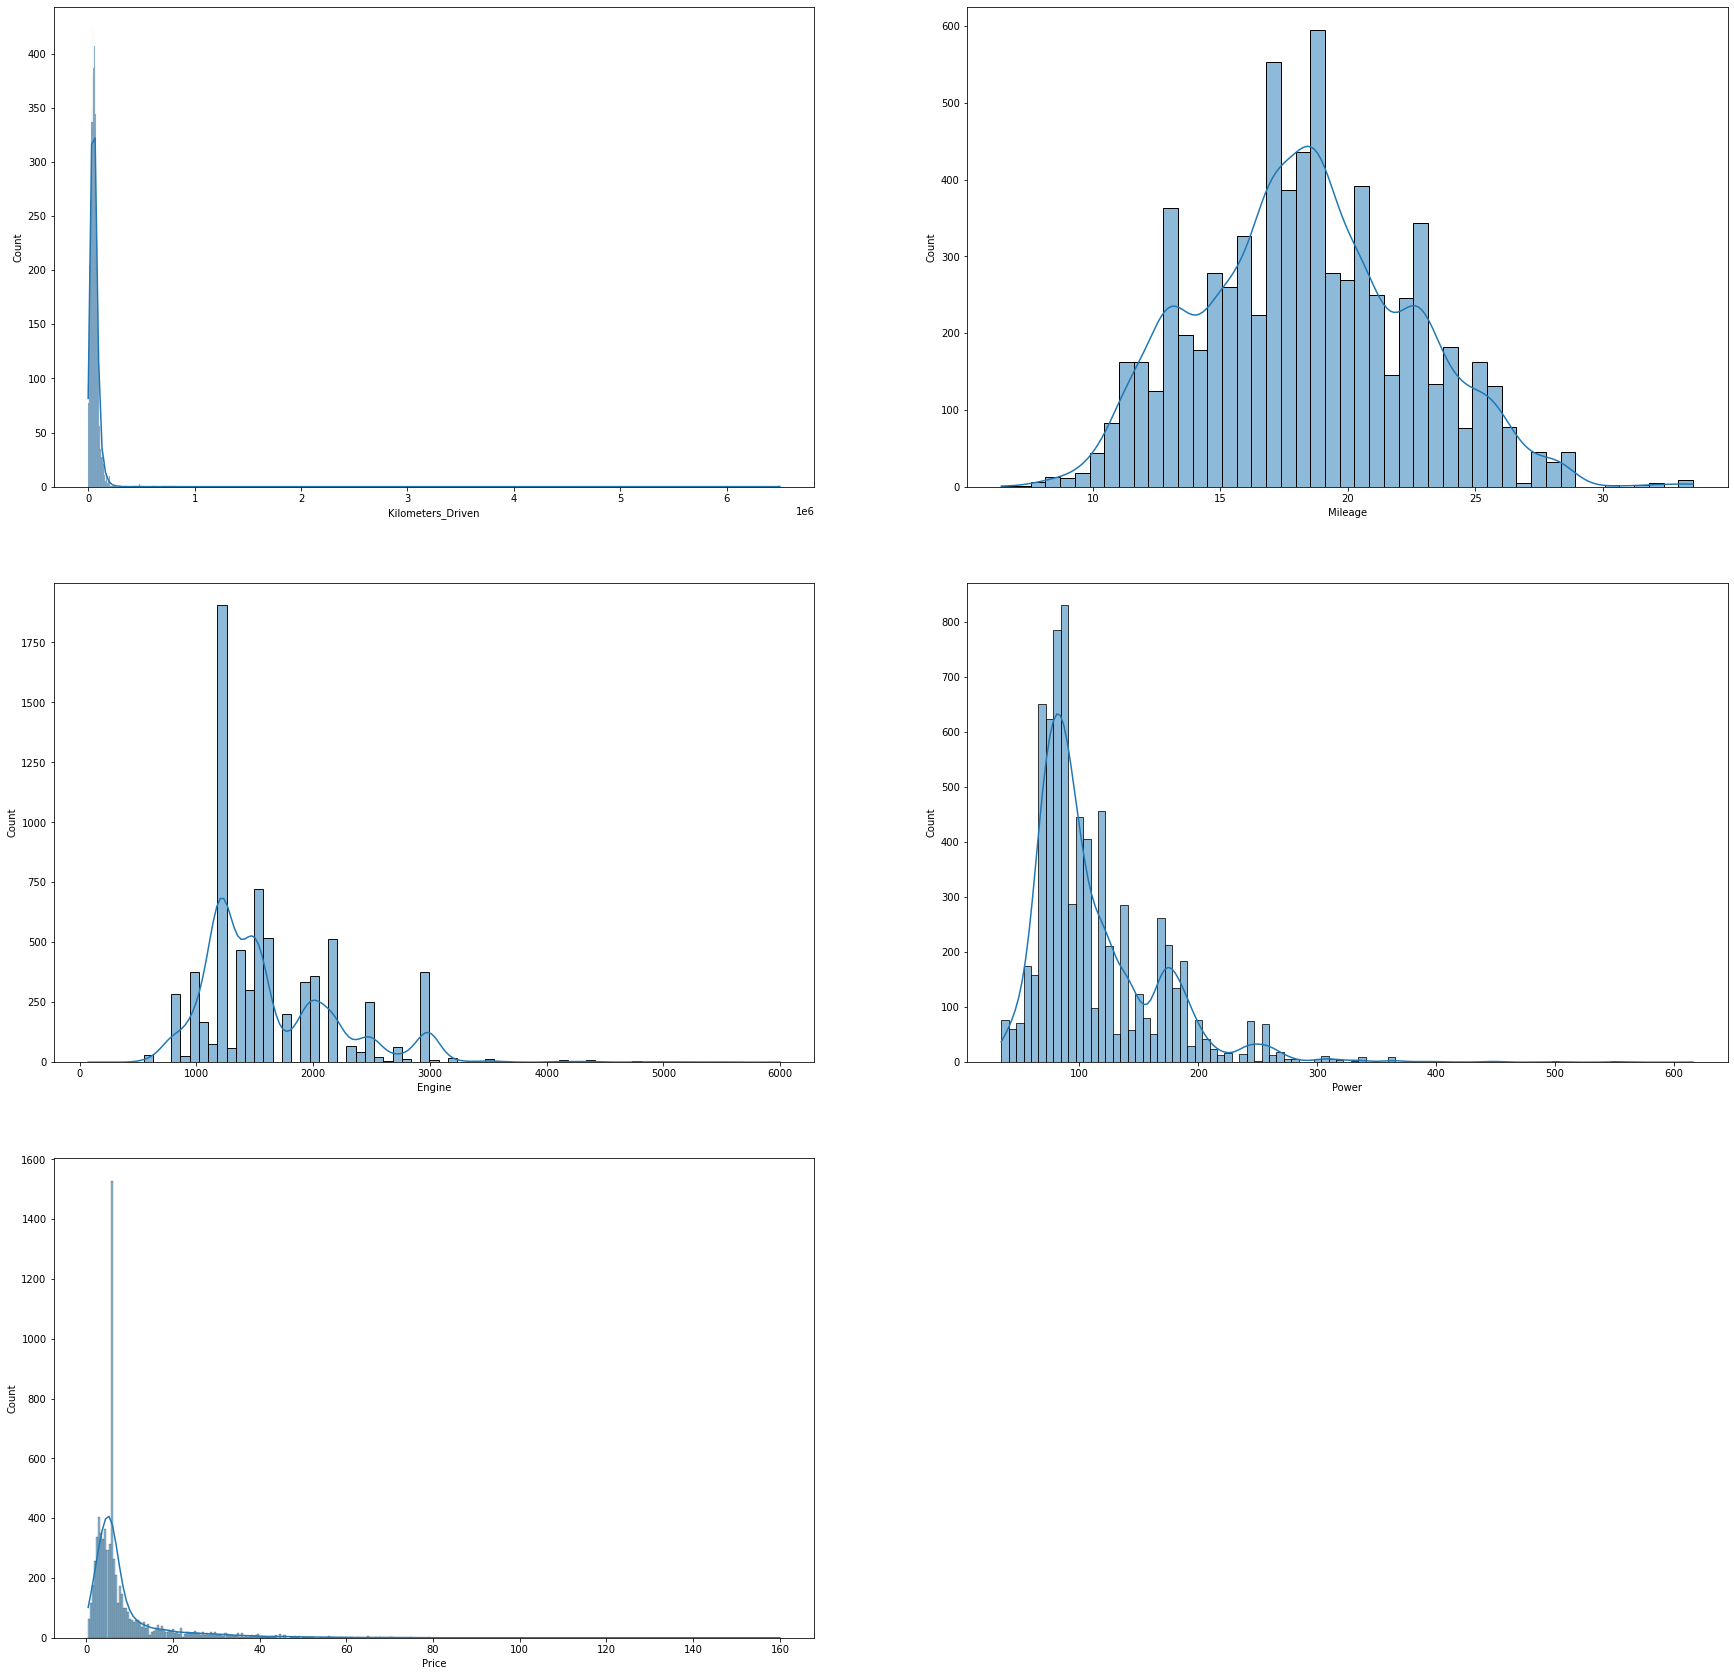

In [95]:
numerical_columns = [col for col in df.columns if col not in categorical_columns]     # generate numercial_columns

plt.figure(figsize = (30, 30))     # histogram for numercial variables
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde = True)

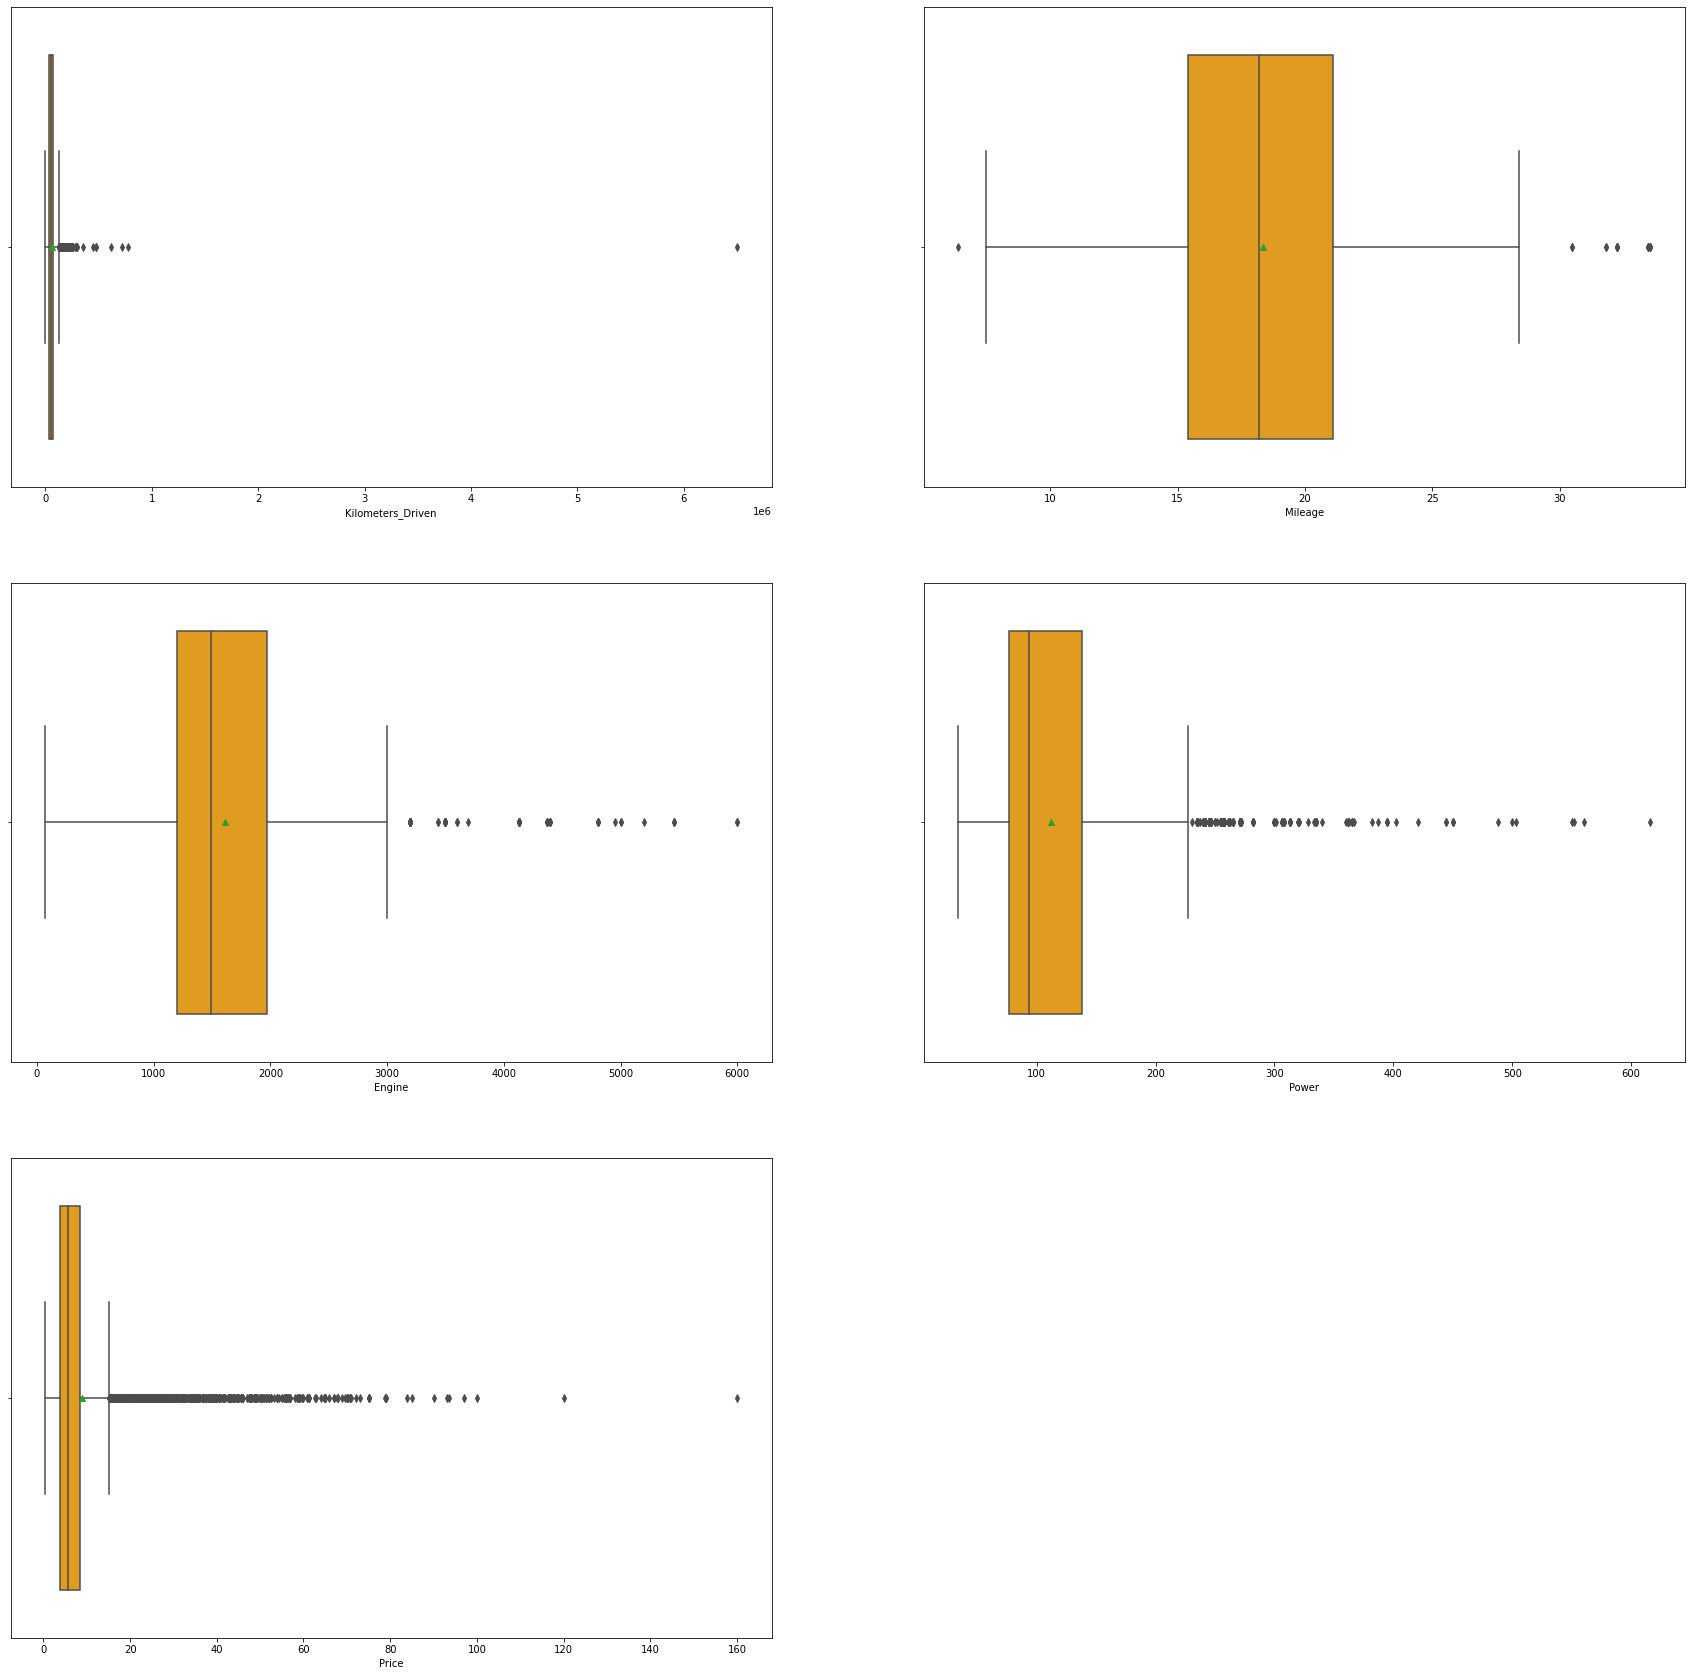

In [96]:
plt.figure(figsize = (30, 30))     # box plot for numercial variables
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x = df[col], showmeans=True, color = 'orange')   # show the position of mean

**observation:**
- Mileage has an approximate normal distribution.
- Kilometers_Driven and Price are very skewed, with lots of outliers at the right. 

#### drop Model_Name, plot the distribution of the remaining categorical variables

In [103]:
df.drop('Model_Name', axis = 1, inplace = True)  # drop Model_Name
categorical_columns.pop()
categorical_columns_excluding_name = categorical_columns[: -1]     # categorical variables except Brand_Name

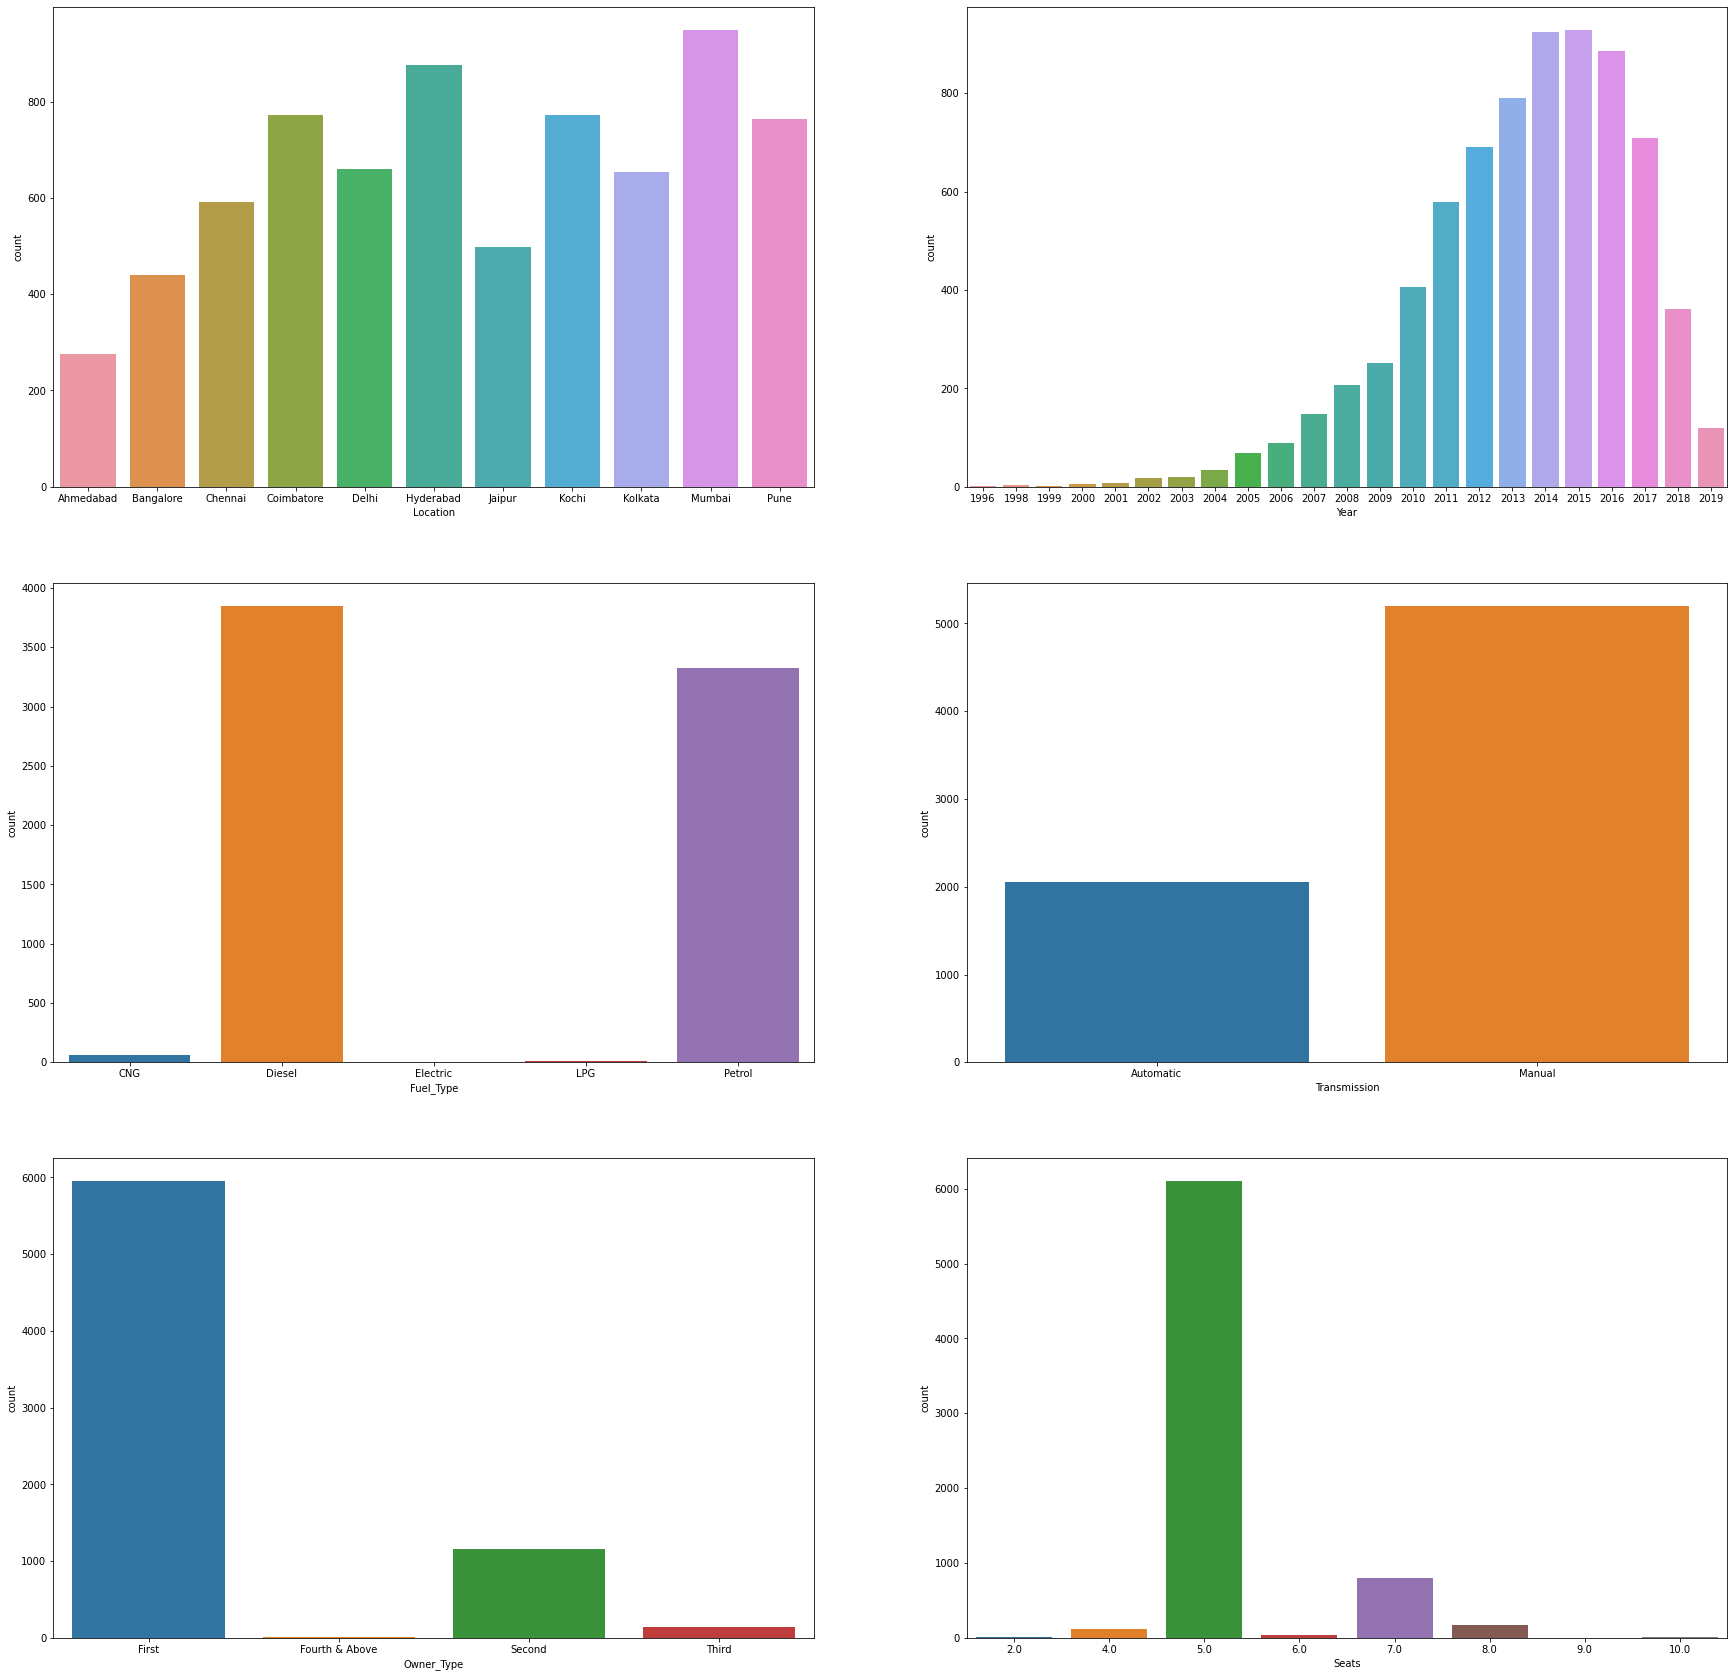

In [113]:
plt.figure(figsize = (30, 30))     # coutplot for categorical_columns_excluding_name
for i, col in enumerate(categorical_columns_excluding_name):
    plt.subplot(3, 2, i + 1)
    sns.countplot(df[col])

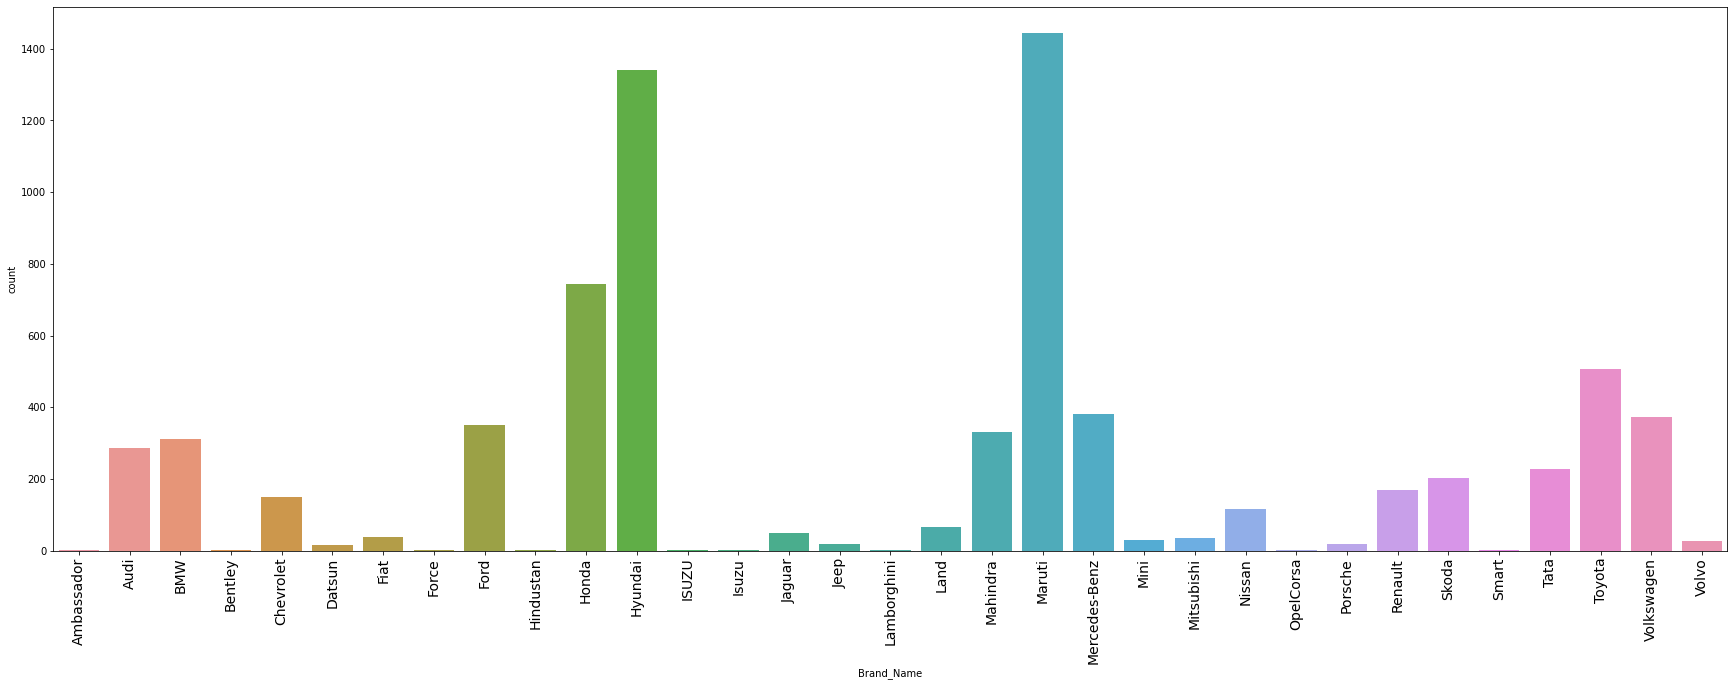

In [114]:
plt.figure(figsize = (30, 10))
sns.countplot(df.Brand_Name);    # countplot for Brand_Name
plt.xticks(fontsize = 14, rotation = 90);

**observation:**
- Cars are approximately evenly distributed among 11 cities.
- Manufacturing years are between 1996 - 2019, most concentring on 2010- 2018. Few were manufactured before 2005.
- Most cars use Diesel and Petrol.
- Manual transmission is more than automatic transmission.
- Most cars have only 1 or 2 previous owner(s). Few have more than 3 owners.
- Most cars have 5 seats and 7 seats. only a few have 2 seats and more than 8 seats.
- The majority of used cars are Maruti, Hyundai and Honda.

In [116]:
phase4 = df.copy()   # delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [117]:
df = phase4.copy() # drop model name, data summary and univariate analysis. delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

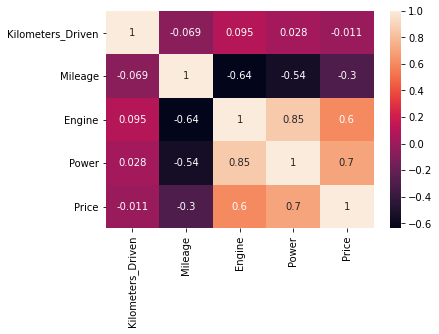

In [119]:
sns.heatmap(data = df.corr(), annot = True);   # generate heatmap

**observation:** 
- It shows Mileage and Engine are negatively correlated, while Engine and Power are positively correlated. It corresponding to the fact that the higher an engine's displacement the more power it can creates, therefore more fuel is consumed since it draws in more of the air/fuel mixture per revolution.
- Price and Engine/ Power are positively correlated.

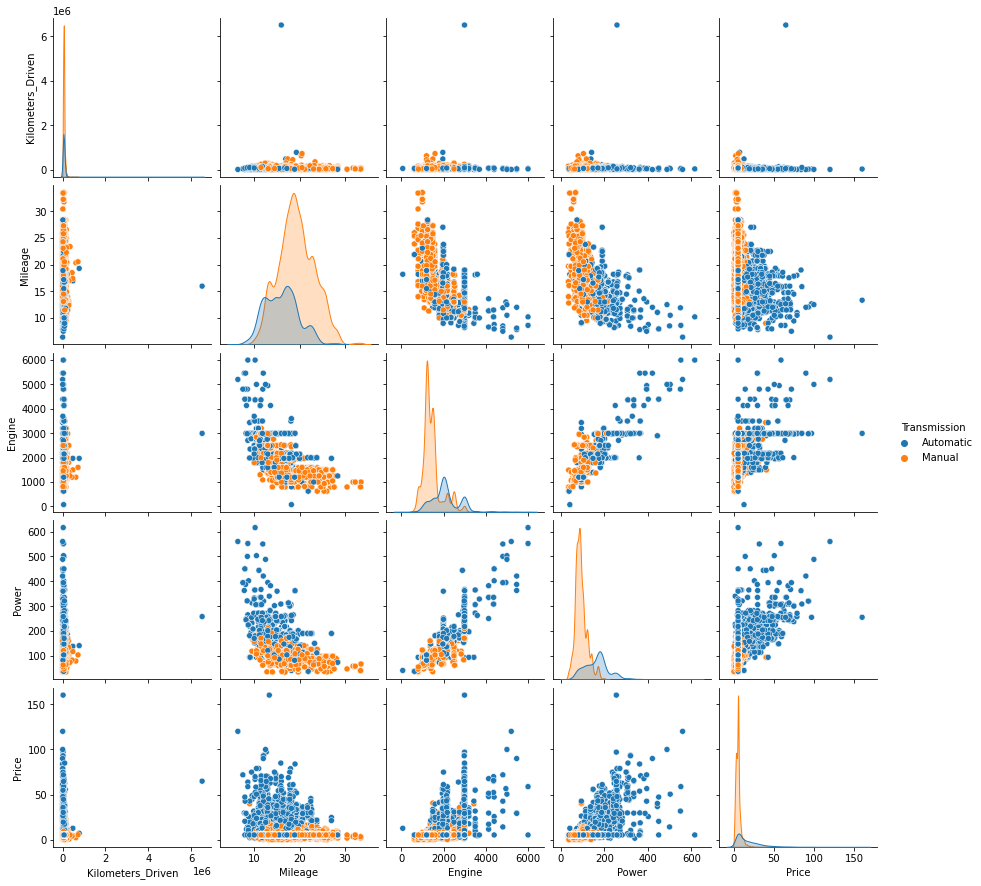

In [121]:
sns.pairplot(df, hue = 'Transmission');